# Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I am using the IMDb data set for this project. This dataset has thousands of entries for movies since 1960. This will be a very interesting data set to work with. I am curious as to which actors have the most movies and what the revenue looks like over the years. 
>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> I will need to download the data file I will be analysing and upload it to Notebooks so it is available. Then I will upload it to this sheet as a variable so I can run additional analysis as needed. 

### General Properties

In [2]:
# Loading the data and having a look at the first few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Check the different columns, sizes, and types of objects
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Trim data
> There are several columns that will not be needed in my analysis, some columns are missing data points and so removing these columns will help clean up the data. 

In [4]:
#creating a list of columns to be deleted
columns_to_remove = ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', \
                     'overview', 'production_companies', 'vote_count', 'vote_average', 'tagline']

#deleting the columns
df = df.drop(columns_to_remove, axis=1)

#previewing the new dataset
df.head()


,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


In [5]:
# Verifying the new DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
release_year      10866 non-null int64
dtypes: int64(4), object(5)
memory usage: 764.1+ KB


### Data Cleaning 

Now that I have removed any unneeded columns, I will need to replace '0' with NaN values. The following code will perform this action.

In [6]:
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [7]:
# Verifying the new DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 9 columns):
budget            3850 non-null float64
revenue           3850 non-null float64
original_title    3850 non-null object
cast              3850 non-null object
director          3850 non-null object
runtime           3850 non-null float64
genres            3850 non-null object
release_date      3850 non-null object
release_year      3850 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 300.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Average revenue of movies over the years


In [8]:
# I extracted the 2 columns that will be needed to answer this question

rev = df[['revenue','release_year']]
rev.head()

,revenue,release_year
0,1.513529e+09,2015
1,3.784364e+08,2015
2,2.952382e+08,2015
3,2.068178e+09,2015
4,1.506249e+09,2015


In [9]:
# I will use the Pandas groupby function to group the data based off of year and use mean() to calculate the 
# average for the year

revenue_by_year = rev.groupby('release_year').mean()
revenue_by_year.head()

,revenue
release_year,
1960,2.580100e+07
1961,3.377202e+07
1962,2.947569e+07
1963,2.942115e+07
1964,4.694479e+07


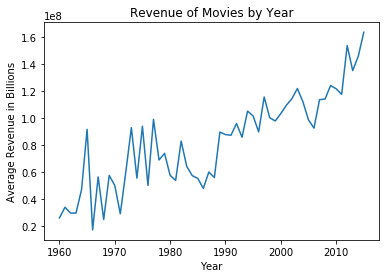

In [10]:
plt.xlabel('Year')
plt.ylabel('Average Revenue in Billions')
plt.title('Revenue of Movies by Year')
plt.plot(revenue_by_year)

### Research Question 2 : Which actors had the most lead roles?

> For this portion, I will need to extract the cast column from the dataset and separate by "|".

In [11]:
# This function will split the element by '|' and return a new DataFrame as cast

cast = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))

cast.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [12]:
# The top 10 actors with leading roles

cast['cast_1'].value_counts().head(10)

Nicolas Cage             37
Bruce Willis             32
Johnny Depp              30
Sylvester Stallone       29
Robert De Niro           28
Tom Hanks                28
Denzel Washington        28
Tom Cruise               27
Arnold Schwarzenegger    26
Adam Sandler             24
Name: cast_1, dtype: int64

In [13]:
# The top 10 co-staring actors

cast['cast_2'].value_counts().head(10)

Gene Hackman        13
Jennifer Aniston    13
Morgan Freeman      13
Julianne Moore      12
Brad Pitt           12
Ewan McGregor       11
Robert De Niro      11
Gwyneth Paltrow     11
Diane Keaton        11
Kate Winslet        10
Name: cast_2, dtype: int64

<a id='conclusions'></a>
## Conclusions

> From the graph on the first question that asks what is the average revenue for movies over the years show that there has been a steady increase since 1960. Though this information implies that revenue is increasing, it does not take into account inflation or other factors that may not be apparant. More research is needed before conclusions can be made. 
>
> The second research question, Which actor had played the most lead roles? shows that Nicholas Cage had the most leads with 37. It was interesting to see that a female lead did not appear in the top ten. There is a very large difference in the actor with the most lead roles and the actor with the most co-star roles which is Gene Hackman with 13. More analysis is needed before conclusions can be made from this data. 